![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de modelos Bagging, Random Forest y XGBoost

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de Bagging, Random Forest y XGBoost. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este taller se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False


In [4]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [5]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
X.columns

Index(['Year', 'Mileage', 'M_Camry', 'M_Camry4dr', 'M_CamryBase', 'M_CamryL',
       'M_CamryLE', 'M_CamrySE', 'M_CamryXLE'],
      dtype='object')

### Punto 1 - Árbol de decisión manual

En la celda 1 creen un árbol de decisión **manualmente**  que considere los set de entrenamiento y test definidos anteriormente y presenten el RMSE y MAE del modelo en el set de test.

In [7]:
# Celda 1


### Punto 2 - Bagging manual

En la celda 2 creen un modelo bagging **manualmente** con 10 árboles de regresión y comenten sobre el desempeño del modelo.

In [8]:
# Celda 2


### Punto 3 - Bagging con librería

En la celda 3, con la librería sklearn, entrenen un modelo bagging con 10 árboles de regresión y el parámetro `max_features` igual a `log(n_features)` y comenten sobre el desempeño del modelo.

In [9]:
# Celda 3


### Punto 4 - Random forest con librería

En la celda 4, usando la librería sklearn entrenen un modelo de Randon Forest para regresión  y comenten sobre el desempeño del modelo.

In [10]:
# Celda 4


### Punto 5 - Calibración de parámetros Random forest

En la celda 5, calibren los parámetros max_depth, max_features y n_estimators del modelo de Random Forest para regresión, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

#### n_estimators Random Forest

In [11]:
# Creación de lista de valores para iterar sobre diferentes valores de n_estimators
estimator_range = range(10, 210, 10)

mse_estimator = []

# Uso de un 5-fold cross-validation para cada valor de n_estimators
for estimator in estimator_range:
    reg = RandomForestRegressor(n_estimators=estimator, random_state=5042025, n_jobs=-1)
    mse_estimator.append(-cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean())

Text(0, 0.5, 'MSE')

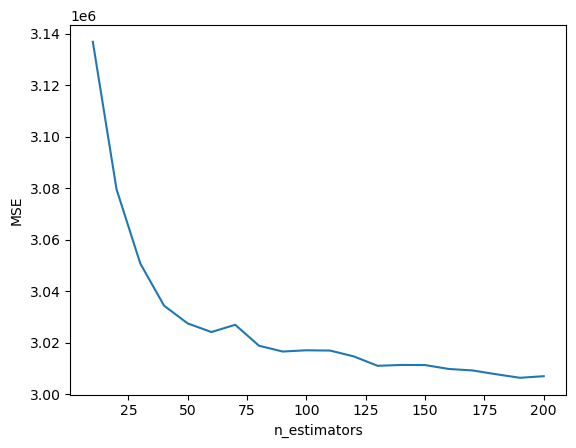

In [12]:
# Gráfica del desempeño del modelo vs la cantidad de n_estimators
plt.plot(estimator_range, mse_estimator)
plt.xlabel('n_estimators')
plt.ylabel('MSE')

In [13]:
min(zip(mse_estimator, estimator_range))

(3006358.473913443, 190)

#### Max_features Random Forest

In [14]:
# Creación de lista de valores para iterar sobre diferentes valores de max_features
feature_range = range(1,X_train.shape[1]+1)

mse_feautures = []

# Uso de un 10-fold cross-validation para cada valor de max_features
for feature in feature_range:
    reg = RandomForestRegressor(n_estimators=200, max_features=feature, random_state=5042025, n_jobs=-1)
    mse_feautures.append(-cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean())

Text(0, 0.5, 'MSE')

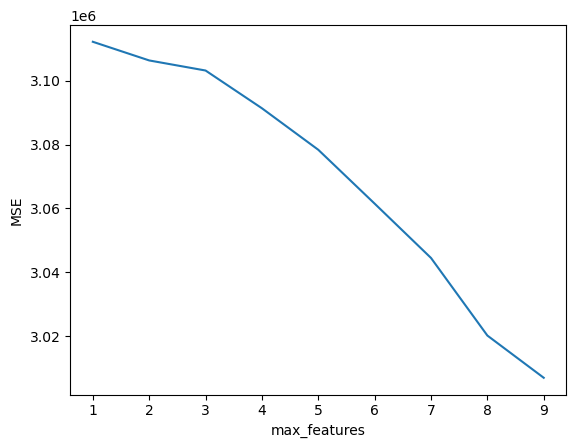

In [15]:
# Gráfica del desempeño del modelo vs la cantidad de max_features
plt.plot(feature_range, mse_feautures)
plt.xlabel('max_features')
plt.ylabel('MSE')

In [16]:
min(zip(mse_feautures, feature_range))

(3006970.2265543793, 9)

#### Max depth Random Forest

In [17]:
depth = range (1, 21)

mse_depth = []

for de in depth:
    reg = RandomForestRegressor(n_estimators=200, random_state=5042025, n_jobs=-1, max_depth = de)
    mse_depth.append(-cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean())

Text(0, 0.5, 'MSE')

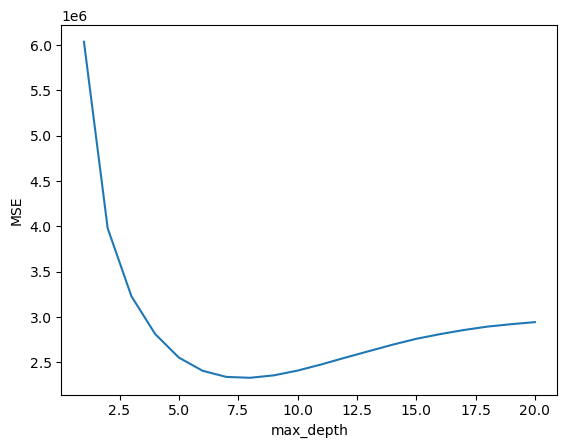

In [18]:
plt.plot(depth,  mse_depth)
plt.xlabel('max_depth')
plt.ylabel('MSE')

In [22]:
min(zip(mse_depth, depth))

(2329734.4716987526, 8)

#### Random Forest calibrado

In [23]:
rf = RandomForestRegressor(n_estimators=180, max_features= 9, max_depth=8, random_state=5042025, n_jobs=-1)

In [24]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=9, n_estimators=180, n_jobs=-1,
                      random_state=5042025)

In [25]:
pred_rf = rf.predict(X_test)
metrics.mean_squared_error(y_test, pred_rf)

2448802.2812020383

El modelo Random Forest sin calibrar tiene un error cuádratico medio de 3.092.499 al predecir el precio de los carros. Cuando realizamos el ajuste del modelo considerando los parámetros óptimos obtenemos una reducción del error hasta 2.448.802, indicando que ahora el modelo tiene un error promedio de 1.564 USD en la predicción del precio.

### Punto 6 - XGBoost con librería

En la celda 6 implementen un modelo XGBoost de regresión con la librería sklearn y comenten sobre el desempeño del modelo.

In [29]:
# Celda 6
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=5042025)

In [30]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [31]:
pred_xgb = xgb.predict(X_test)
metrics.mean_squared_error(y_test, pred_xgb)

2576781.0

### Punto 7 - Calibración de parámetros XGBoost

En la celda 7 calibren los parámetros learning rate, gamma y colsample_bytree del modelo XGBoost para regresión, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [ ]:
# Celda 7


### Punto 8 - Comparación y análisis de resultados
En la celda 8 comparen los resultados obtenidos de los diferentes modelos (random forest y XGBoost) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [ ]:
# Celda 8
